In [1]:
import numpy as np
from block_based_rlnc import BlockBasedRLNC
import plotly.express as px
import plotly.graph_objects as go

In [2]:
%%capture
rlnc = BlockBasedRLNC(field_order=2**8, generation_size=16,
                      packet_size=16, total_size=1024*32,
                      initial_redundancy=1, initial_window_size=1, exponential_loss_param=0.045);

analytics_result = rlnc.run_simulation()

In [3]:
df = analytics_result.get_analytics_data_frame()
df

,time,type,redundancy,window size,generation window,average needed packets,generation size,loss rate,new coded packets count,extra packets count,received packets,effective packets,linearly dependent packets,redundant packets
0,1,send,1.0,1.0,[0],NaN,None,0.007,17.0,0.0,NaN,NaN,NaN,NaN
1,2,receive,NaN,NaN,None,NaN,None,NaN,NaN,NaN,16.0,16.0,0.0,0.0
2,3,feedback,NaN,NaN,None,0.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,send,1.0,2.0,"[1, 2]",NaN,None,0.019,34.0,0.0,NaN,NaN,NaN,NaN
4,5,receive,NaN,NaN,None,NaN,None,NaN,NaN,NaN,33.0,32.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,95,receive,NaN,NaN,None,NaN,None,NaN,NaN,NaN,72.0,68.0,0.0,4.0
95,96,feedback,NaN,NaN,None,-1.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,97,send,2.0,4.0,"[125, 126, 127]",NaN,None,0.049,54.0,3.0,NaN,NaN,NaN,NaN
97,98,receive,NaN,NaN,None,NaN,None,NaN,NaN,NaN,54.0,51.0,0.0,3.0


In [11]:
%%capture
rlnc_constant_loss = BlockBasedRLNC(field_order=2**8, generation_size=16,
                                    packet_size=16, total_size=1024*32,
                                    initial_redundancy=0, initial_window_size=1, loss_rate=0.4, loss_mode="constant")

analytics_result_constant_loss = rlnc_constant_loss.run_simulation()

In [12]:
df2 = analytics_result_constant_loss.get_analytics_data_frame()
df2

,time,type,redundancy,window size,generation window,average needed packets,generation size,loss rate,new coded packets count,extra packets count,received packets,effective packets,linearly dependent packets,redundant packets
0,1,send,0.0,1.0,[0],NaN,None,0.4,16.0,0.0,NaN,NaN,NaN,NaN
1,2,receive,NaN,NaN,None,NaN,None,NaN,NaN,NaN,9.0,9.0,0.0,0.0
2,3,feedback,NaN,NaN,None,7.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,send,0.0,1.0,[1],NaN,None,0.4,16.0,7.0,NaN,NaN,NaN,NaN
4,5,receive,NaN,NaN,None,NaN,None,NaN,NaN,NaN,13.0,13.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,392,receive,NaN,NaN,None,NaN,None,NaN,NaN,NaN,1.0,1.0,0.0,0.0
392,393,feedback,NaN,NaN,None,0.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393,394,send,0.0,4.0,[],NaN,None,0.4,0.0,1.0,NaN,NaN,NaN,NaN
394,395,receive,NaN,NaN,None,NaN,None,NaN,NaN,NaN,1.0,1.0,0.0,0.0


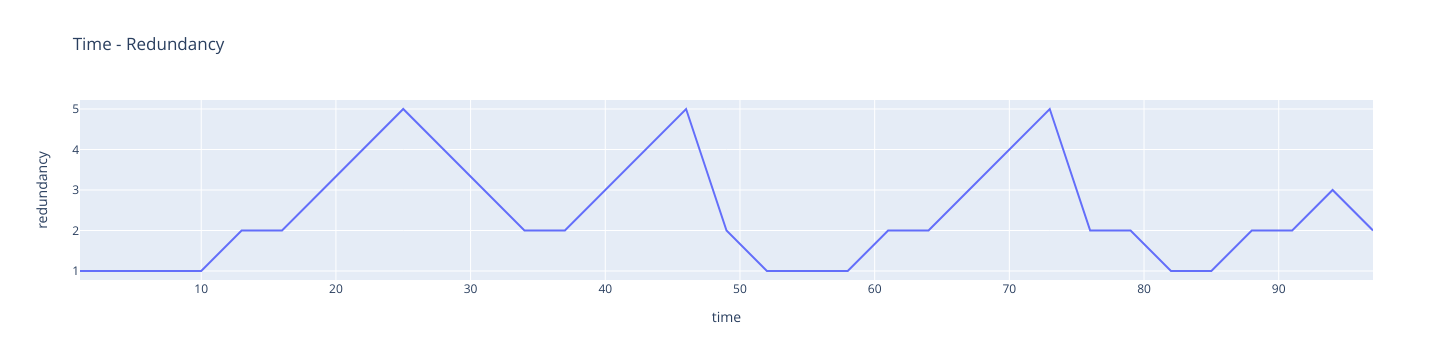

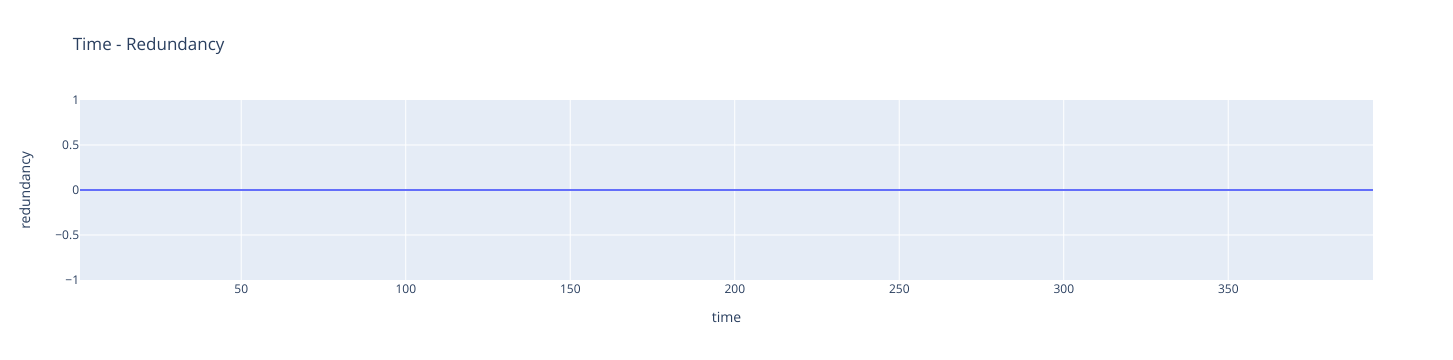

In [13]:
# dfs = {"df1" : df, "df2": df2}
# fig = go.Figure()
# for i in dfs:
#     fig = fig.add_trace(go.Scatter(x = dfs[i]["time"],
#                                    y = dfs[i]["redundancy"], 
#                                    name = i))
# fig.show()
fig = px.line(df.query("type=='send'"), x="time", y="redundancy", title='Time - Redundancy')
fig.show()
fig = px.line(df2.query("type=='send'"), x="time", y="redundancy", title='Time - Redundancy')
fig.show()

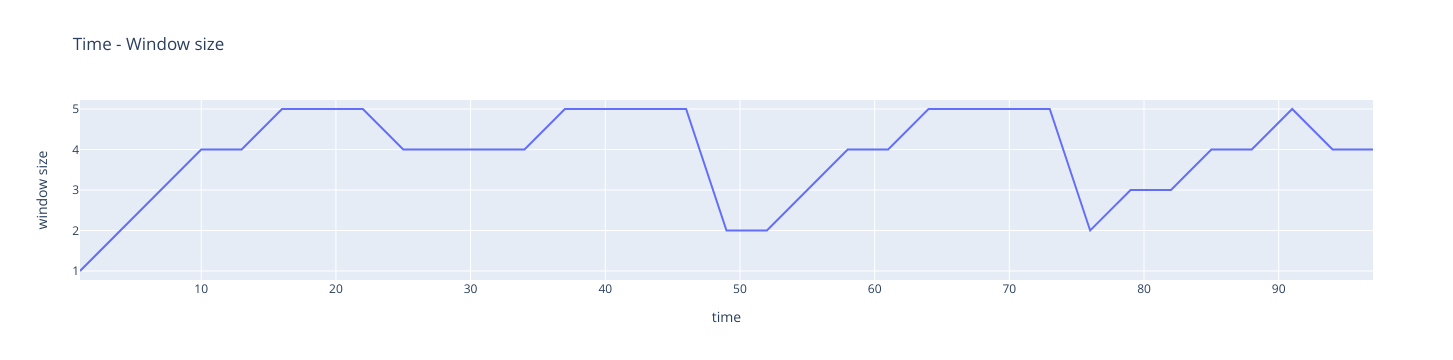

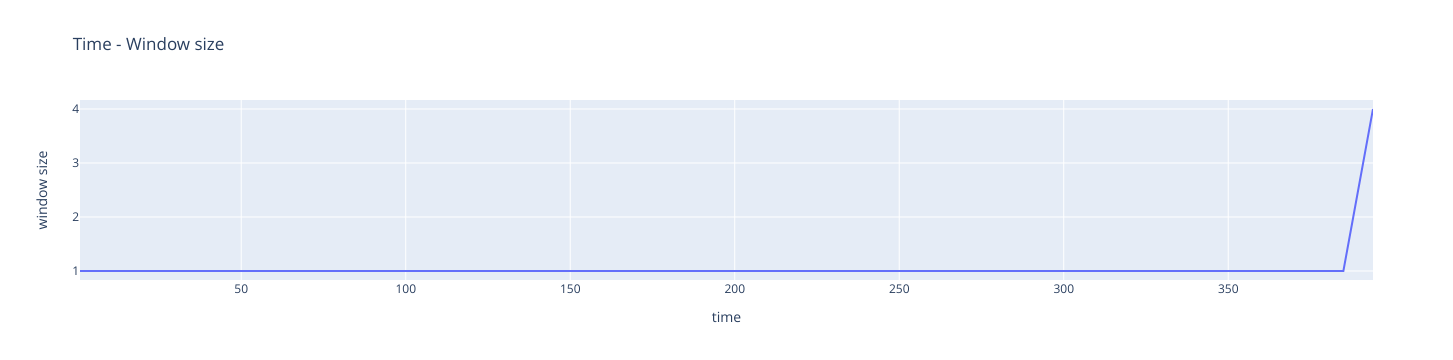

In [14]:
fig = px.line(df.query("type=='send'"), x="time", y="window size", title='Time - Window size')
fig.show()
fig = px.line(df2.query("type=='send'"), x="time", y="window size", title='Time - Window size')
fig.show()

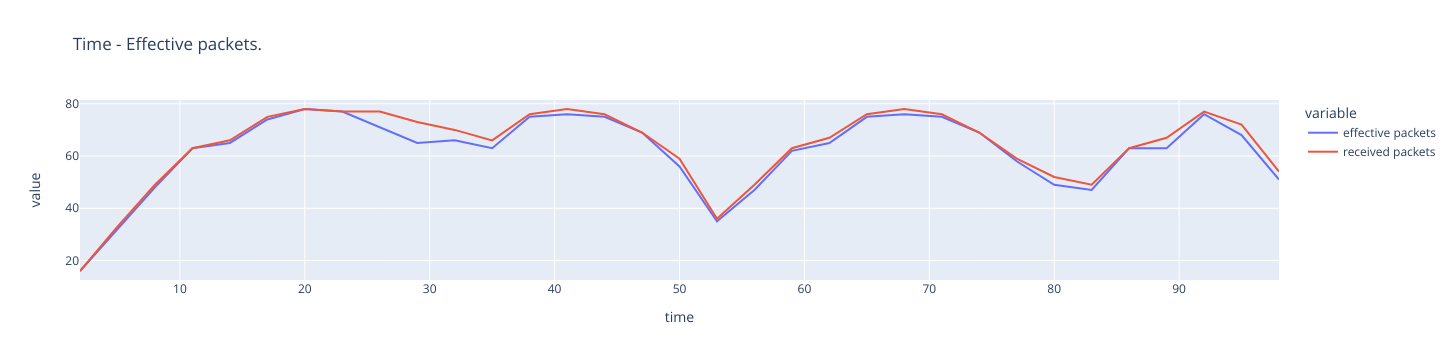

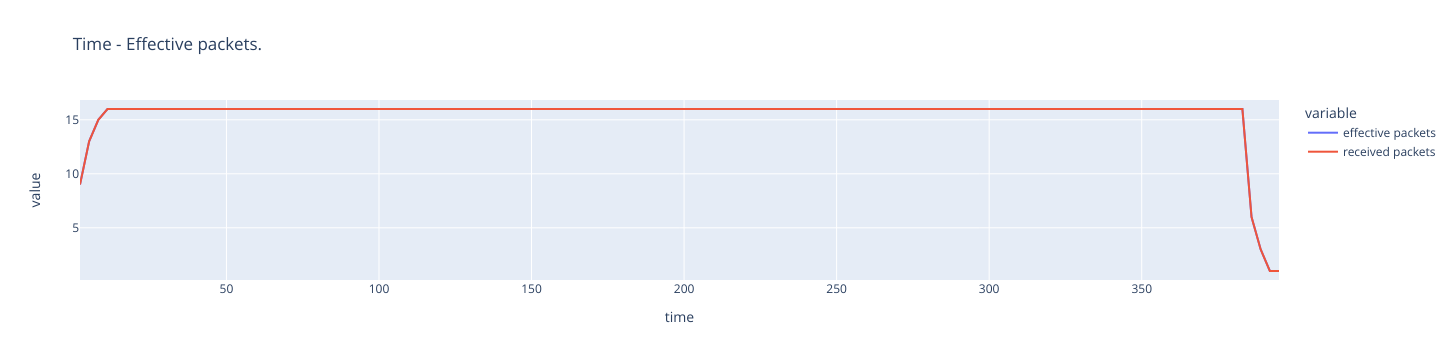

In [15]:
fig = px.line(df.query("type=='receive'"), x="time", y=["effective packets","received packets"],title='Time - Effective packets.')
fig.show()
fig = px.line(df2.query("type=='receive'"), x="time", y=["effective packets","received packets"],title='Time - Effective packets.')
fig.show()

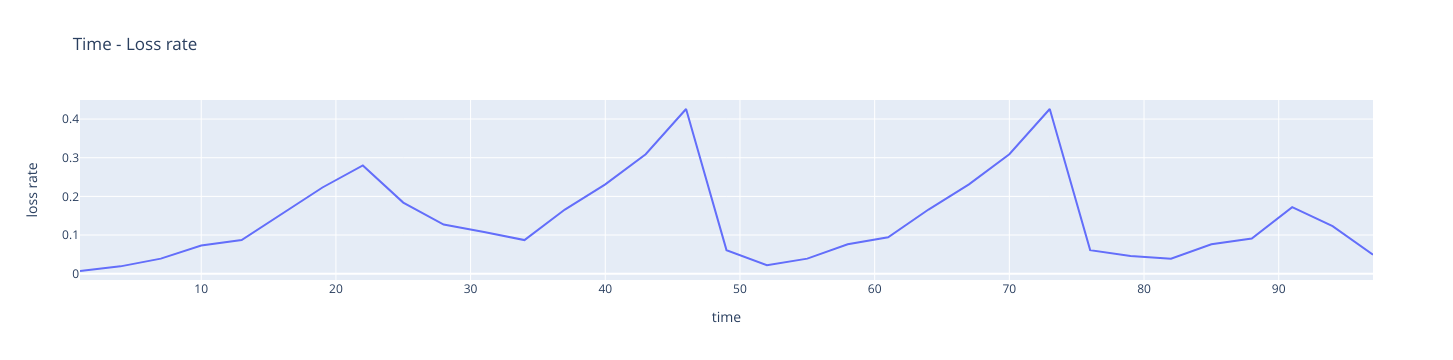

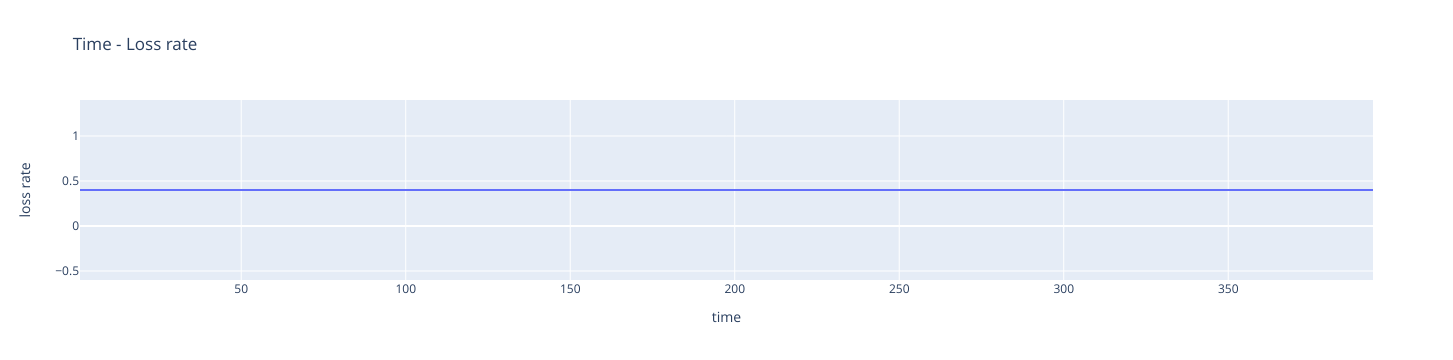

In [16]:
fig = px.line(df.query("type=='send'"), x="time", y="loss rate", title='Time - Loss rate')
fig.show()
fig = px.line(df2.query("type=='send'"), x="time", y="loss rate", title='Time - Loss rate')
fig.show()

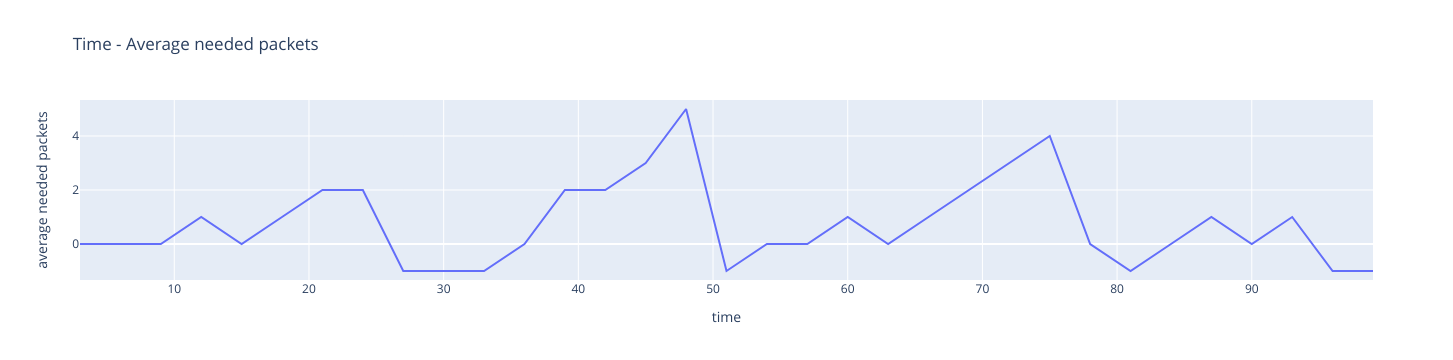

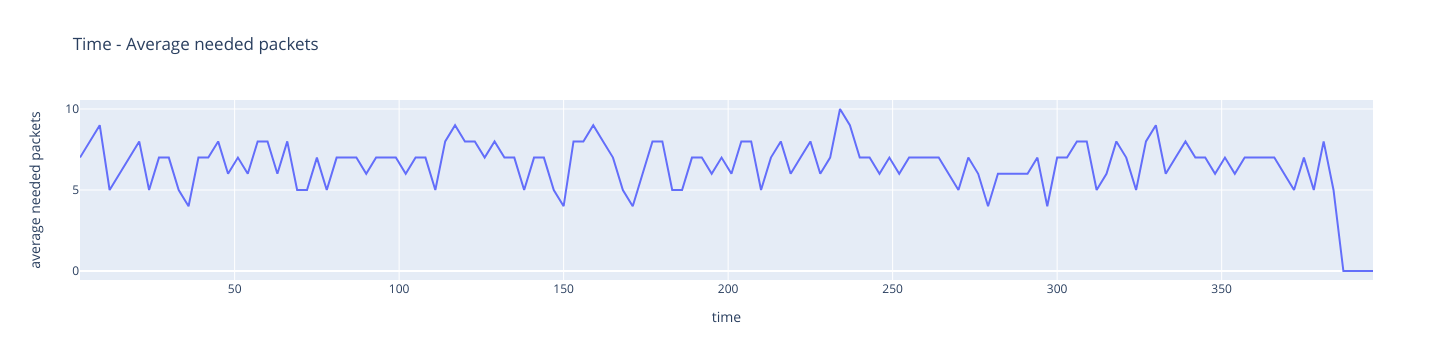

In [17]:
fig = px.line(df.query("type=='feedback'"), x="time", y="average needed packets", title='Time - Average needed packets')
fig.show()
fig = px.line(df2.query("type=='feedback'"), x="time", y="average needed packets", title='Time - Average needed packets')
fig.show()